Some typical NumPy 'random' functions:

In [ ]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [1]:
import pandas as pd
import numpy as np
import time

# Timing pandas
start_time_pandas = time.time()
data_pandas = pd.DataFrame(np.random.randint(1, 101, size=(1000000,)))
end_time_pandas = time.time()

# Timing NumPy
start_time_numpy = time.time()
data_numpy = np.random.randint(1, 101, size=1000000)
end_time_numpy = time.time()

# Results
pandas_time = end_time_pandas - start_time_pandas
numpy_time = end_time_numpy - start_time_numpy

print(f"Pandas time: {pandas_time:.6f} seconds")
print(f"NumPy time: {numpy_time:.6f} seconds")

# Faster one
faster = "NumPy" if numpy_time < pandas_time else "Pandas"
print(f"{faster} is faster.")


Pandas time: 0.012322 seconds
NumPy time: 0.011502 seconds
NumPy is faster.


AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [10]:
import pandas as pd
import numpy as np
import time

def calculate_time(func):
    start_time = time.time()
    result = func()
    end_time = time.time()
    time_taken = end_time - start_time
    print(f"{func.__name__} Time Taken: {time_taken} seconds")
    return result, time_taken

def pandas_operations():
    df_pandas = pd.read_csv('C:/Users/zyx/Desktop/python作业/exercise/exercise6/sleep_health.csv')
    # 选择数值型列
    numeric_cols = df_pandas.select_dtypes(include=[np.number])
    mean_values = numeric_cols.mean()
    
    # 计算相关性矩阵
    correlation_matrix = numeric_cols.corr()
    sleep_duration_age_corr = correlation_matrix.loc['Age', 'Sleep Duration']
    sleep_duration_heart_rate_corr = correlation_matrix.loc['Heart Rate', 'Sleep Duration']
    sleep_duration_daily_steps_corr = correlation_matrix.loc['Daily Steps', 'Sleep Duration']
    
    # 计算标准差
    std_sleep_duration = numeric_cols['Sleep Duration'].std()
    
    return (mean_values, sleep_duration_age_corr, sleep_duration_heart_rate_corr, sleep_duration_daily_steps_corr, std_sleep_duration)

# Write your code for AIM #2 here
import pandas as pd
import numpy as np
import time

# Loading the CSV file as an array in NumPy
start_time_numpy = time.time()
data = np.genfromtxt('C:/Users/zyx/Desktop/python作业/exercise/exercise6/sleep_health.csv', delimiter=',', skip_header=0, dtype=None, encoding='utf-8', names=True)
# Create separate arrays for the individual columns that you want to operate on

# For example, to create a separate array for 'Age' column
age = data['Age'].astype(int)
Sleep_Duration = data['Sleep_Duration'].astype(int)
systolic_bp = data['Systolic_blood_pressure'].astype(float)
diastolic_bp = data['Diastolic_blood_pressure'].astype(float)
heart_rate = data['Heart_Rate'].astype(float)
daily_steps = data['Daily_Steps'].astype(float)

mean_sleep_duration_numpy = np.mean(Sleep_Duration)
mean_systolic_bp_numpy = np.mean(systolic_bp)
mean_diastolic_bp_numpy = np.mean(diastolic_bp)
mean_heart_rate_numpy = np.mean(heart_rate)
mean_daily_steps_numpy = np.mean(daily_steps)
print("----------mean value--------")
print(f"mean_sleep_duration_numpy:{mean_sleep_duration_numpy}")
print(f"mean_systolic_bp_numpy:{mean_systolic_bp_numpy}")
print(f"mean_diastolic_bp_numpy:{mean_diastolic_bp_numpy}")
print(f"mean_heart_rate_numpy:{mean_heart_rate_numpy}")
print(f"mean_daily_steps_numpy:{mean_daily_steps_numpy}")


# Calculate the correlation in NumPy using np.corrcoef()
numeric_data = np.column_stack((Sleep_Duration, systolic_bp, diastolic_bp, heart_rate, daily_steps, age))
correlation_matrix_numpy = np.corrcoef(numeric_data.T)
print("------------correlation--------------")
print(correlation_matrix_numpy)

# The correlation coefficient is located in the off-diagonal elements [0,1] or [1,0]
sleep_duration_age_corr_numpy = correlation_matrix_numpy[0, 5]
sleep_duration_heart_rate_corr_numpy = correlation_matrix_numpy[0, 3]
sleep_duration_daily_steps_corr_numpy = correlation_matrix_numpy[0, 4]

# Use np-std() to calculate Standard deviation
std_sleep_duration_numpy = np.std(Sleep_Duration)
time_taken_numpy = time.time() - start_time_numpy

----------mean value--------
mean_sleep_duration_numpy:6.759358288770054
mean_systolic_bp_numpy:128.55347593582889
mean_diastolic_bp_numpy:84.64973262032086
mean_heart_rate_numpy:70.16577540106952
mean_daily_steps_numpy:6816.844919786096
------------correlation--------------
[[ 1.         -0.13811884 -0.11864297 -0.51392113 -0.01198452  0.43664225]
 [-0.13811884  1.          0.97288499  0.29414292  0.10334222  0.60587844]
 [-0.11864297  0.97288499  1.          0.27109222  0.24198597  0.59383892]
 [-0.51392113  0.29414292  0.27109222  1.         -0.03030858 -0.22560619]
 [-0.01198452  0.10334222  0.24198597 -0.03030858  1.          0.0579734 ]
 [ 0.43664225  0.60587844  0.59383892 -0.22560619  0.0579734   1.        ]]


AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

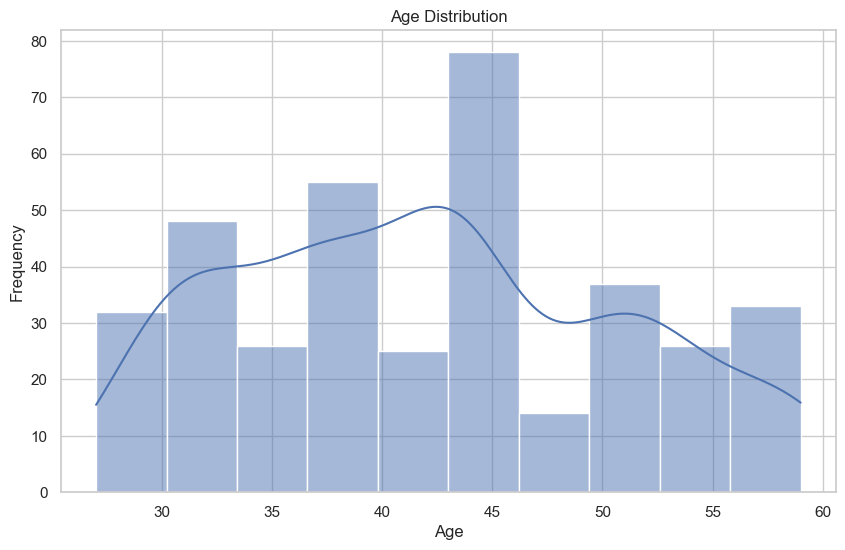

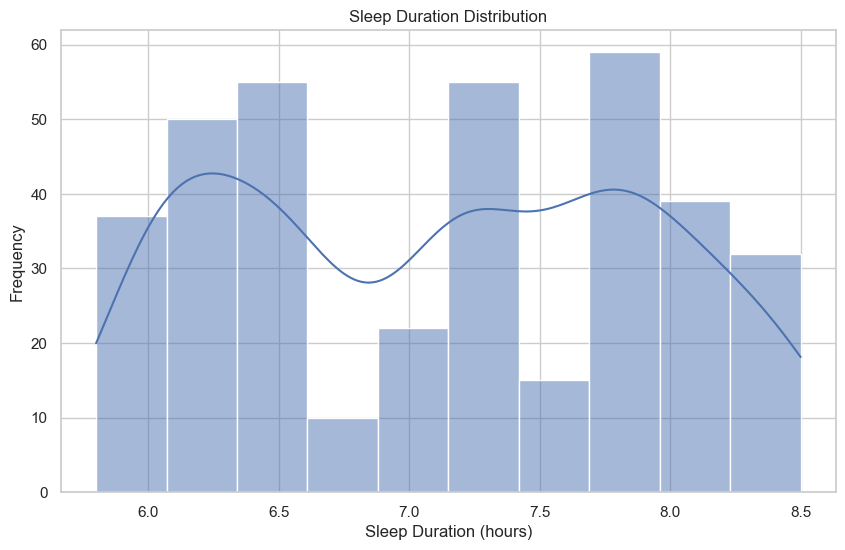

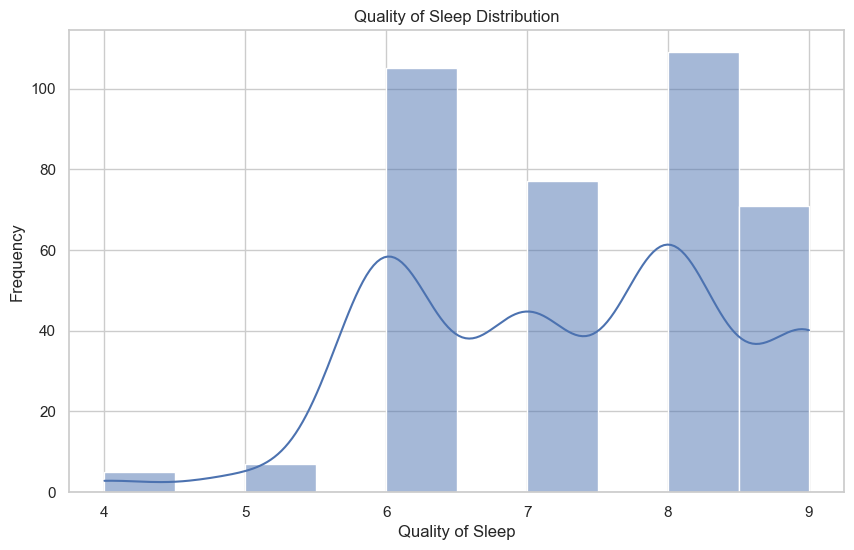

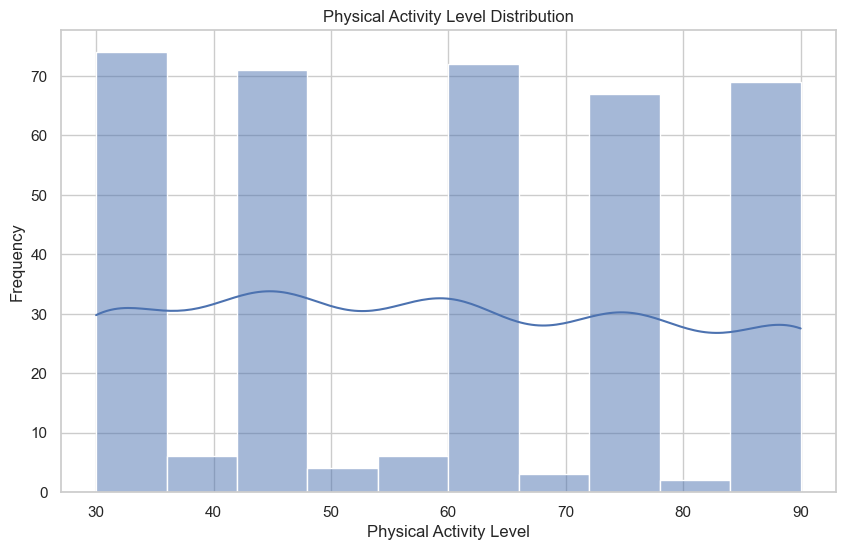

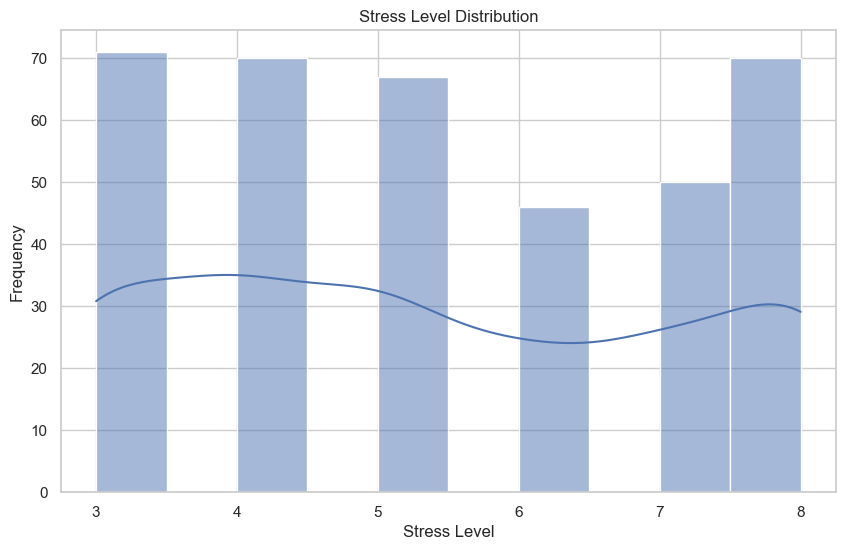

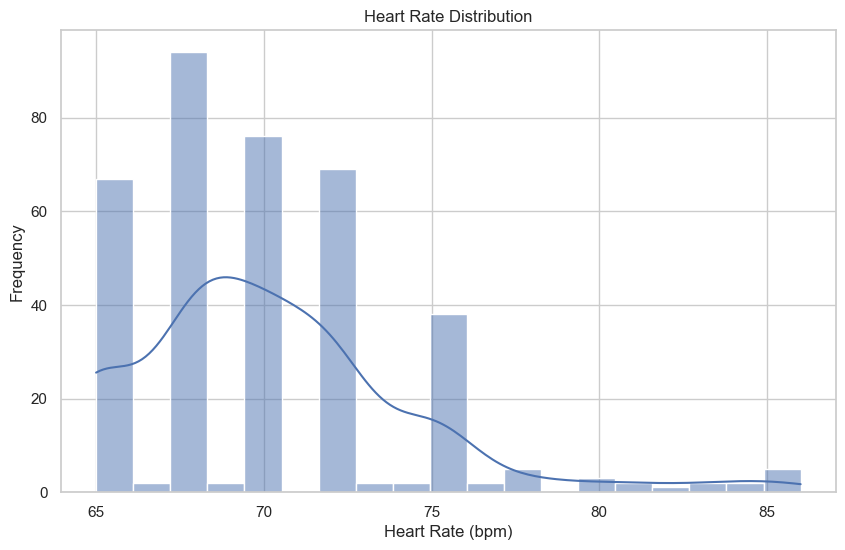

pandas_plots Time Taken: 1.6218791007995605 seconds


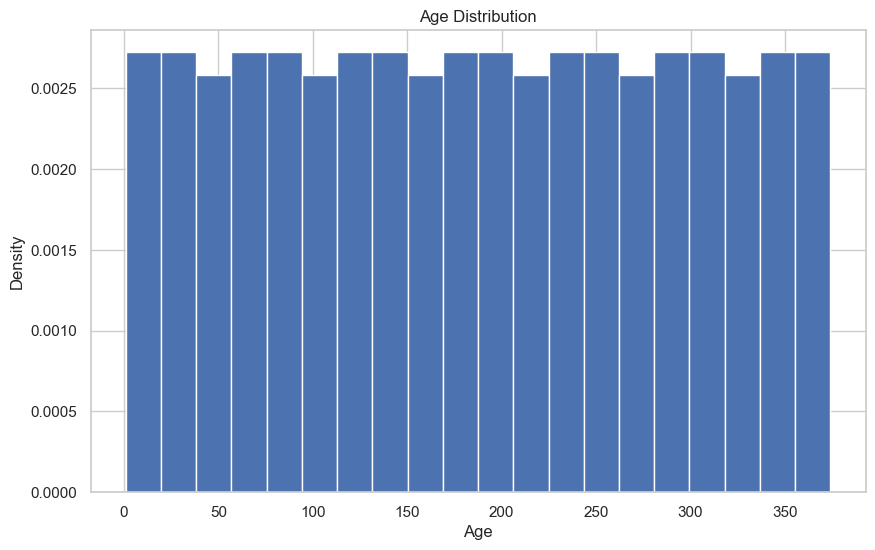

c:\Users\zyx\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axes\_axes.py:6973: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
c:\Users\zyx\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axes\_axes.py:6974: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

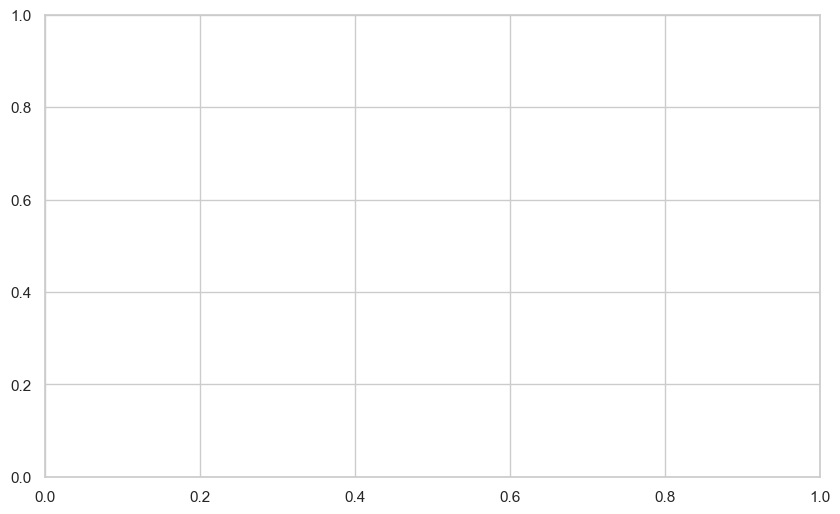

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

def calculate_time(func):
    start_time = time.time()
    result = func()
    end_time = time.time()
    time_taken = end_time - start_time
    print(f"{func.__name__} Time Taken: {time_taken} seconds")
    return result, time_taken

def pandas_plots():
    df = pd.read_csv('C:/Users/zyx/Desktop/python作业/exercise/exercise6/sleep_health.csv')
    sns.set(style="whitegrid")
    
    plt.figure(figsize=(10,6))
    sns.histplot(df['Age'], kde=True)
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()
    
    plt.figure(figsize=(10,6))
    sns.histplot(df['Sleep Duration'], kde=True)
    plt.title('Sleep Duration Distribution')
    plt.xlabel('Sleep Duration (hours)')
    plt.ylabel('Frequency')
    plt.show()
    
    plt.figure(figsize=(10,6))
    sns.histplot(df['Quality of Sleep'], kde=True)
    plt.title('Quality of Sleep Distribution')
    plt.xlabel('Quality of Sleep')
    plt.ylabel('Frequency')
    plt.show()
    
    plt.figure(figsize=(10,6))
    sns.histplot(df['Physical Activity Level'], kde=True)
    plt.title('Physical Activity Level Distribution')
    plt.xlabel('Physical Activity Level')
    plt.ylabel('Frequency')
    plt.show()
    
    plt.figure(figsize=(10,6))
    sns.histplot(df['Stress Level'], kde=True)
    plt.title('Stress Level Distribution')
    plt.xlabel('Stress Level')
    plt.ylabel('Frequency')
    plt.show()
    
    plt.figure(figsize=(10,6))
    sns.histplot(df['Heart Rate'], kde=True)
    plt.title('Heart Rate Distribution')
    plt.xlabel('Heart Rate (bpm)')
    plt.ylabel('Frequency')
    plt.show()

def numpy_plots():
    data = np.genfromtxt('C:/Users/zyx/Desktop/python作业/exercise/exercise6/sleep_health.csv', delimiter=',', skip_header=1)
    
    plt.figure(figsize=(10,6))
    plt.hist(data[:, 0], bins=20, density=True)
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Density')
    plt.show()
    
    plt.figure(figsize=(10,6))
    plt.hist(data[:, 1], bins=20, density=True)
    plt.title('Sleep Duration Distribution')
    plt.xlabel('Sleep Duration (hours)')
    plt.ylabel('Density')
    plt.show()
    
    plt.figure(figsize=(10,6))
    plt.hist(data[:, 2], bins=20, density=True)
    plt.title('Quality of Sleep Distribution')
    plt.xlabel('Quality of Sleep')
    plt.ylabel('Density')
    plt.show()
    
    plt.figure(figsize=(10,6))
    plt.hist(data[:, 3], bins=20, density=True)
    plt.title('Physical Activity Level Distribution')
    plt.xlabel('Physical Activity Level')
    plt.ylabel('Density')
    plt.show()
    
    plt.figure(figsize=(10,6))
    plt.hist(data[:, 4], bins=20, density=True)
    plt.title('Stress Level Distribution')
    plt.xlabel('Stress Level')
    plt.ylabel('Density')
    plt.show()
    
    plt.figure(figsize=(10,6))
    plt.hist(data[:, 5], bins=20, density=True)
    plt.title('Heart Rate Distribution')
    plt.xlabel('Heart Rate (bpm)')
    plt.ylabel('Density')
    plt.show()

pandas_time, _ = calculate_time(pandas_plots)
numpy_time, _ = calculate_time(numpy_plots)

print(f"Pandas Plotting Time: {pandas_time} seconds")
print(f"NumPy Plotting Time: {numpy_time} seconds")

AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy



C:\Users\zyx\AppData\Local\Temp\ipykernel_54356\3060036104.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([male_sleep_duration, female_sleep_duration], labels=['Male', 'Female'])


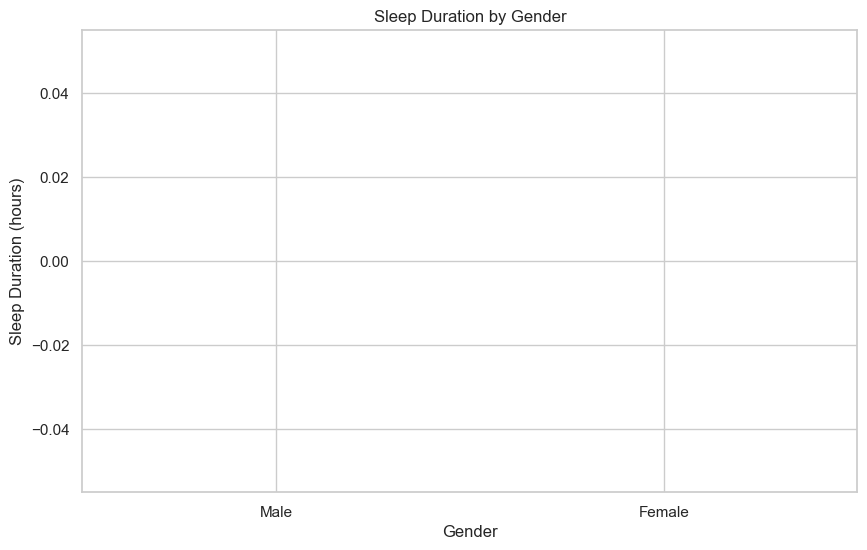

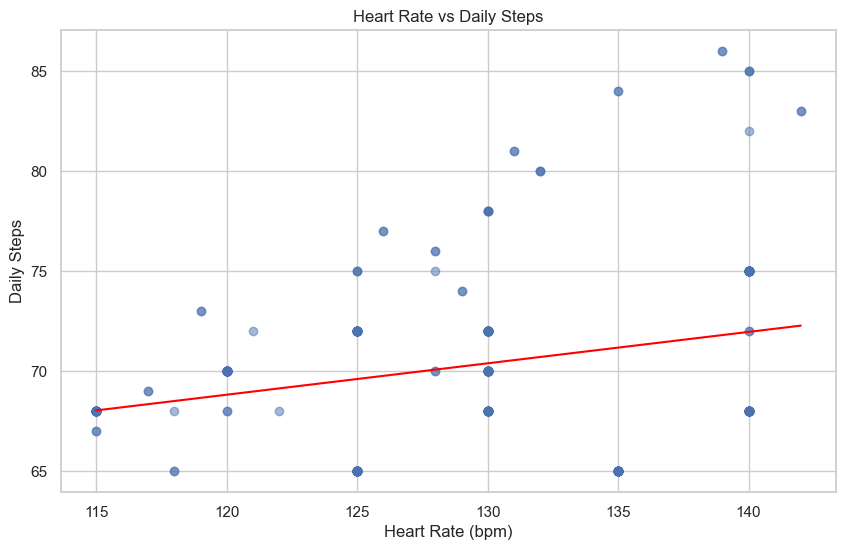

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = np.genfromtxt('C:/Users/zyx/Desktop/python作业/exercise/exercise6/sleep_health.csv', delimiter=',', skip_header=1)

# Assuming 'Gender', 'Sleep Duration', 'BMI Category', 'Sleep Disorder', 'Heart Rate', 'Daily Steps' are columns 2, 4, 8, 16, 9, 11 respectively

# Boxplot for Sleep Duration grouped by Gender
gender = data[:, 2]
sleep_duration = data[:, 4]

# Filter data for each gender
male_sleep_duration = sleep_duration[gender == 0]
female_sleep_duration = sleep_duration[gender == 1]

plt.figure(figsize=(10,6))
plt.boxplot([male_sleep_duration, female_sleep_duration], labels=['Male', 'Female'])
plt.title('Sleep Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# Violin plot (This requires a workaround since NumPy doesn't support it)
# We'll skip this plot for NumPy demonstration purposes.

# Pairplot (Not directly supported by NumPy)
# We'll skip this plot for NumPy demonstration purposes.

# Countplot for Sleep Disorder
# This would require binning and counting, which is more complex in NumPy.
# We'll skip this plot for NumPy demonstration purposes.

# Scatterplot for Heart Rate vs Daily Steps with a regression line (using np.polyfit for regression)
heart_rate = data[:, 9]
daily_steps = data[:, 11]

# Perform linear regression
coefficients = np.polyfit(heart_rate, daily_steps, 1)
polynomial = np.poly1d(coefficients)

# Plot the data
plt.figure(figsize=(10,6))
plt.scatter(heart_rate, daily_steps, alpha=0.5)

# Plot the regression line
sorted_indices = np.argsort(heart_rate)
plt.plot(heart_rate[sorted_indices], polynomial(heart_rate[sorted_indices]), color='red')

plt.title('Heart Rate vs Daily Steps')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Daily Steps')
plt.show()